# Comparative topological analysis of the Escherichia coli and Homo sapiens interactome

The core of this work is taken from the practical class of the Biological Dataset course explained by Karan Kabbur Hanumanthappa Manjunatha, PhD student of Modeling Engineering Risk and Complexity (**MERC**). 

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

import networkx as nx

import os
import time

from collections import Counter

import random as random
import matplotlib.pyplot as plt
import operator

import itertools

!pip install pyvis

In [2]:
df_ppi_ecoli = pd.read_csv("E_coli_interfacesHQ.txt", sep="\t", header=None)

# rename the columns
df_ppi_ecoli.rename(columns={0:"proteinA", 1:"proteinB"}, inplace=True)

# clean the dataset
df_ppi_ecoli.drop_duplicates(inplace=True)
df_ppi_ecoli.dropna(inplace=True)

df_ppi_ecoli = df_ppi_ecoli[["proteinA", "proteinB"]][1:]

# remove self loops
bool_list = (~(df_ppi_ecoli["proteinA"]  == df_ppi_ecoli["proteinB"])).to_list()
df_ppi_ecoli = df_ppi_ecoli.loc[bool_list, :]

df_ppi_ecoli

proteinA proteinB
1      B7UM99   P21244
2      O32583   P30138
3      O52134   P71215
5      P00363   P0A8Q0
6      P00363   P0A8Q2
...       ...      ...
3357   Q46907   Q46908
3363   Q47070   Q47071
3364   Q47070   Q57029
3365   Q47071   Q57029
3368   Q47149   Q47150

[2317 rows x 2 columns]

In [3]:
df_ppi_homosapiens = pd.read_csv("ng_ppi.txt", sep="\t", header=None)

# rename the columns
df_ppi_homosapiens.rename(columns={0:"proteinA", 1:"proteinB"}, inplace=True)

# clean the dataset
df_ppi_homosapiens.drop_duplicates(inplace=True)
df_ppi_homosapiens.dropna(inplace=True)

df_ppi_homosapiens = df_ppi_homosapiens[["proteinA", "proteinB"]][1:]

# remove self loops
bool_list = (~(df_ppi_homosapiens["proteinA"]  == df_ppi_homosapiens["proteinB"])).to_list()
df_ppi_homosapiens = df_ppi_homosapiens.loc[bool_list, :]

df_ppi_homosapiens

proteinA proteinB
1       A0A024R5S0   O75553
2       A0A024R5S0   P25788
3       A0A024R5S0   Q02446
4       A0A024R5S0   Q8N9W6
5       A0A024R5S0   Q93062
...            ...      ...
121732      V9HWI3   V9HWP2
121733      V9HWI5   V9HWN7
121734      V9HWJ0   V9HWP2
121736      V9HWJ1   V9HWK2
121740      V9HWK1   V9HWK2

[117302 rows x 2 columns]

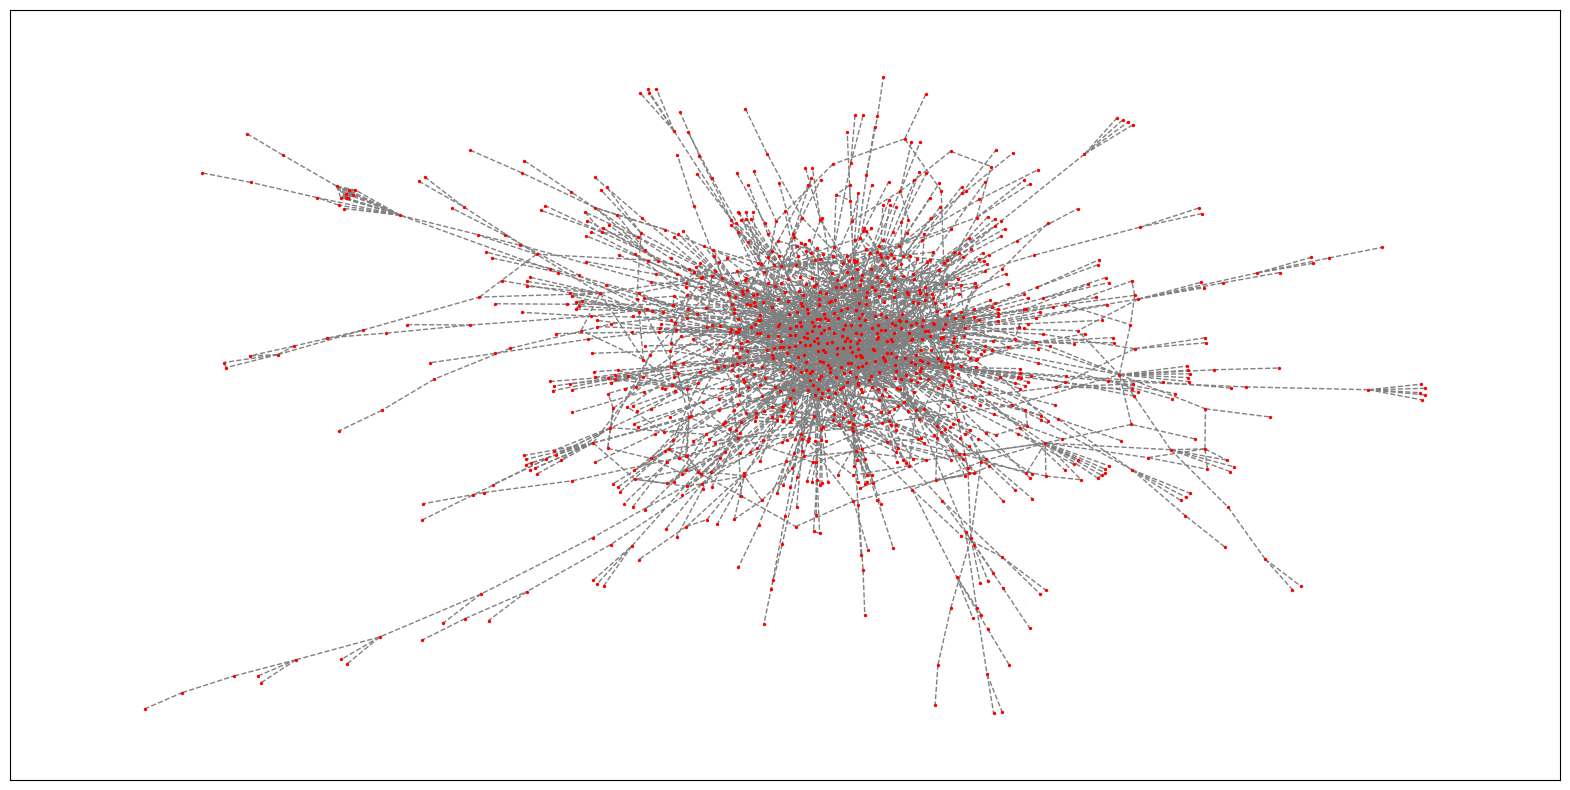

In [4]:
# Quicker method to construct graph directly from pandas dataframe
# see documentation for better understanding
# https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html


G = nx.from_pandas_edgelist(df_ppi_ecoli, source="proteinA", target = "proteinB")
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.

# let's work only with Largest Connected Component
# Connected component?? 
# There always exists a path between any two nodes

# get all connected components
components = nx.connected_components(G)

# sort them in descending order by number of nodes in each broken connected components
lcclist = sorted(list(components), key = len, reverse=True)

# G1 represents the LCC and we will be working on only this from now onwards.
plt.figure(figsize=(20,10))
G1 = nx.subgraph(G, lcclist[0])
nx.draw_networkx(G1, pos=pos, node_color = 'r', node_size=2, edge_color="gray", style="dashed", with_labels=False)

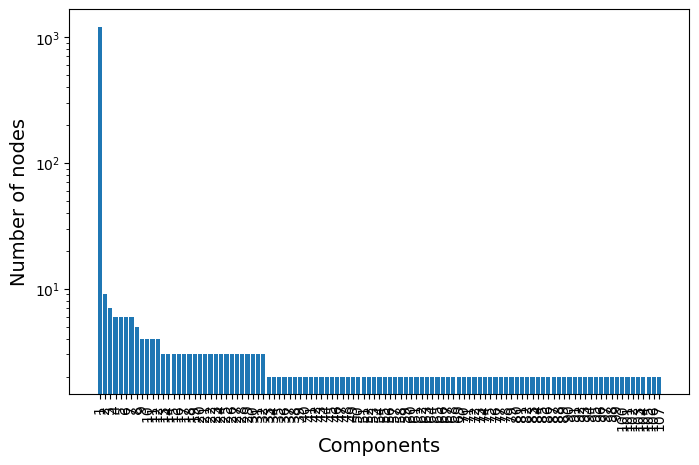

In [5]:
# components is generator, so you have to convert to list using list() function.
n_components = len(lcclist)
nodes_in_components  = [len(lcclist[i]) for i in range(n_components)]


plt.figure(figsize=(8,5))
plt.bar(range(1,len(nodes_in_components)+1), nodes_in_components)
plt.yscale("log")
plt.xticks(range(1,len(nodes_in_components)+1), [str(i) for i in range(1,len(nodes_in_components)+1)], rotation=90)#, size=5)
plt.ylabel("Number of nodes", size=14)
plt.xlabel("Components", size=14)
plt.show()

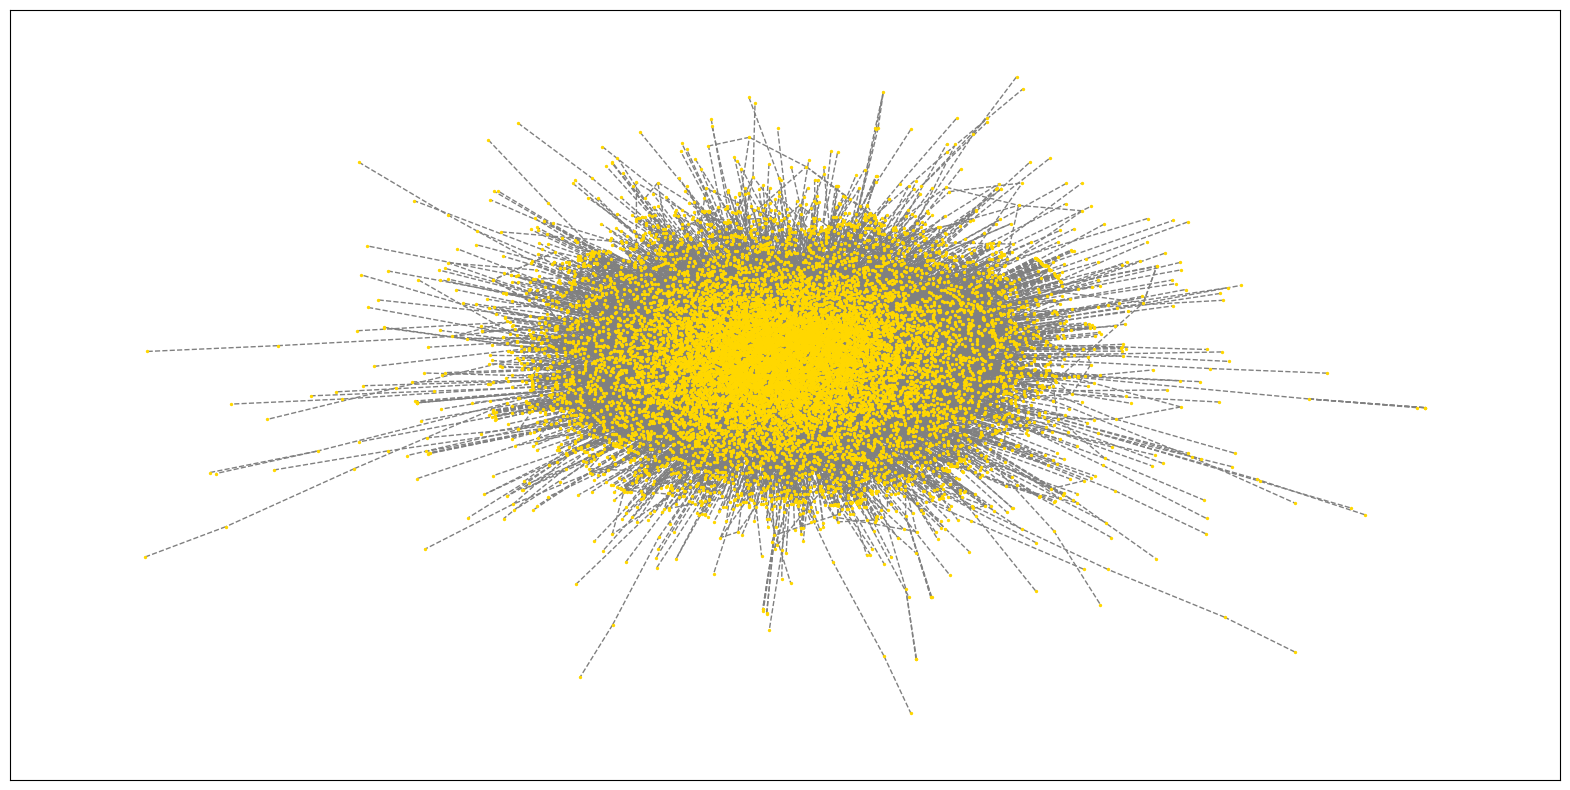

In [6]:
# Quicker method to construct graph directly from pandas dataframe
# see documentation for better understanding
# https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html


GHS = nx.from_pandas_edgelist(df_ppi_homosapiens, source="proteinA", target = "proteinB")
posHS = nx.spring_layout(GHS)  #setting the positions with respect to G, not k.

# let's work only with Largest Connected Component
# Connected component?? 
# There always exists a path between any two nodes

# get all connected components
componentsHS = nx.connected_components(GHS)

# sort them in descending order by number of nodes in each broken connected components
lcclistHS = sorted(list(componentsHS), key = len, reverse=True)

# G1 represents the LCC and we will be working on only this from now onwards.
plt.figure(figsize=(20,10))
G1HS = nx.subgraph(GHS, lcclistHS[0])
nx.draw_networkx(G1HS, pos=posHS, node_color = 'gold', node_size=2, edge_color="gray", style="dashed", with_labels=False)

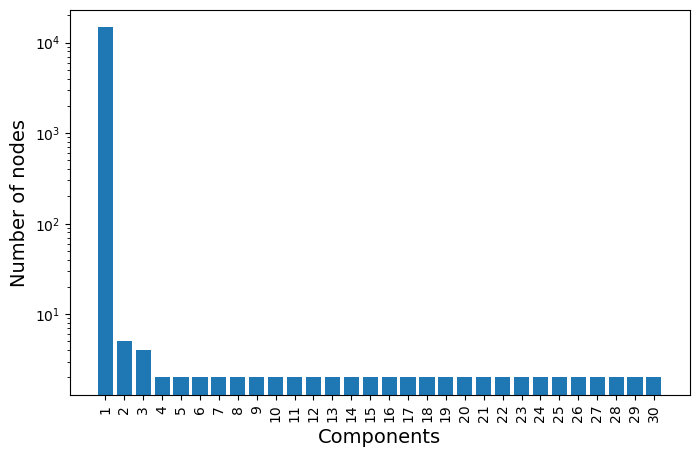

In [7]:
# components is generator, so you have to convert to list using list() function.
n_componentsHS = len(lcclistHS)
nodes_in_componentsHS  = [len(lcclistHS[i]) for i in range(n_componentsHS)]


plt.figure(figsize=(8,5))
plt.bar(range(1,len(nodes_in_componentsHS)+1), nodes_in_componentsHS)
plt.yscale("log")
plt.xticks(range(1,len(nodes_in_componentsHS)+1), [str(i) for i in range(1,len(nodes_in_componentsHS)+1)], rotation=90)
plt.ylabel("Number of nodes", size=14)
plt.xlabel("Components", size=14)
plt.show()

### Manipulating graphs

In [8]:
# ESCHERISCHIA COLI

from pyvis.network import Network

#got_net = nx.from_pandas_edgelist(df_ppi_ecoli, source="proteinA", target = "proteinB")
#got_net = Network(df_ppi_ecoli)
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()

sources = df_ppi_ecoli['proteinA']
targets = df_ppi_ecoli['proteinB']
#weights = df_ppi['Weight']

edge_data = zip(sources, targets) #, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                #w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst)

neighbor_map = got_net.get_adj_list()

print(neighbor_map)

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

{'B7UM99': {'P21244'}, 'P21244': {'B7UM99'}, 'O32583': {'P30138'}, 'P30138': {'P0A6G5', 'P28903', 'O32583'}, 'O52134': {'P71215'}, 'P71215': {'O52134'}, 'P00363': {'P0A8Q0', 'P0AC47', 'P0A8Q2'}, 'P0A8Q0': {'P0A8Q3', 'P00363', 'P0AC47'}, 'P0A8Q2': {'P0A8Q3', 'P00363', 'P0AC47'}, 'P0AC47': {'P0A8Q0', 'P00363', 'P0AAF6', 'P0A8Q2', 'P0A8Q3', 'P08337'}, 'P00452': {'P69924', 'P68688'}, 'P68688': {'P0A6Z6', 'P77174', 'P00452', 'P30750', 'P0AC62', 'P75679', 'P09153'}, 'P69924': {'P00452'}, 'P00550': {'P0AA04'}, 'P0AA04': {'P08839', 'P69791', 'P69783', 'P69797', 'P0AF10', 'P0AFX4', 'P0ABE2', 'P00550', 'P39208'}, 'P00579': {'P0A8T8', 'P0ACJ8', 'P0A7C2', 'P0A7Z5', 'P0A7Z4', 'P09377', 'P0A8T7', 'P75679', 'P0ACH8', 'P0AFX4', 'P09378', 'P39208', 'P0A8V2', 'P06134', 'P0A9E0', 'P0AG96', 'P77396', 'P17410', 'P60240'}, 'P06134': {'P00579', 'P11071', 'P0AEJ8', 'P69931'}, 'P09377': {'P00579', 'P0A7C2', 'P0A9E0', 'P77396', 'P17410'}, 'P09378': {'P00579', 'P17410', 'P0A7C2'}, 'P0A7C2': {'P00579', 'P76161', 

In [9]:
got_net.show_buttons()
got_net.show('test.html', notebook=False)

test.html


In [10]:
# HOMO SAPIENS

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()


sources = df_ppi_homosapiens['proteinA']
targets = df_ppi_homosapiens['proteinB']
#weights = df_ppi['Weight']

edge_data = zip(sources, targets) #, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                #w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst)

neighbor_map = got_net.get_adj_list()

print(neighbor_map)

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

{'A0A024R5S0': {'Q93062', 'Q9NVV9', 'Q02446', 'O75553', 'Q8N9W6', 'P25788'}, 'O75553': {'Q96HR8', 'Q3LI72', 'Q9H9I0', 'Q9H0E2', 'Q6ZXV5', 'P12931', 'Q8N2M8', 'Q8WU79', 'Q8WVV9', 'Q9BQY4', 'Q9NUK0', 'V9HWK4', 'Q96K80', 'P04626', 'Q00535', 'Q3SYF9', 'Q13526', 'P01130', 'P98164', 'Q03989', 'P21860', 'Q00534', 'Q6P1W5', 'Q13427', 'Q9Y2Y4', 'P05067', 'Q6NT76', 'Q7Z3K3', 'Q9Y5V3', 'Q8TBK6', 'Q96HA8', 'Q14114', 'Q6DKI2', 'Q92567', 'Q96SI9', 'Q96MN9', 'Q8TBB1', 'O43251', 'P51693', 'Q9NR56', 'Q5TFQ8', 'Q8N365', 'Q01974', 'Q6IB83', 'Q9NWB1', 'Q59FG2', 'Q9HCL0', 'Q07954', 'O14512', 'Q7Z5C1', 'Q8IUC2', 'Q92835', 'Q15038', 'P84101', 'Q8WVX4', 'P86479', 'P98155', 'O95231', 'Q9BTL3', 'Q15560', 'P86496', 'Q8N8B7', 'O14503', 'P14678', 'Q8IUQ4', 'A0A024R5S0', 'O43820', 'Q3B8N2'}, 'P25788': {'Q3LI72', 'Q96N28', 'P60900', 'Q12846', 'P25789', 'O00232', 'P04156', 'Q6UWL6', 'O43364', 'P18615', 'Q9H8E5', 'P28066', 'Q9NZ81', 'P51665', 'P13498', 'O15320', 'Q9Y297', 'P53350', 'P25787', 'P28072', 'Q9BT73', 'Q8TBN

In [11]:
got_net.show_buttons()
got_net.show('test3.html', notebook=False)

test3.html


In [12]:
def gen_network(df):
    net=Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
    net.barnes_hut()
    #sources=df['Source']
    sources=df['proteinA']
    #targets=df['Target']
    targets=df['proteinB']
    #weights=df['Weight']
    
    g_book=nx.Graph()
    for index,edge in df.iterrows():
        g_book.add_edge(edge['proteinA'], edge['proteinB'])#, weight=edge['Weight'])
    
    edge_data=zip(sources, targets)#, weights)
    degree=nx.degree(g_book)

    for e in edge_data:
        src=e[0]
        dst=e[1]
        #w=e[2]

        net.add_node(src, src, title=src)
        net.add_node(dst, dst, title=dst)
        net.add_edge(src, dst)#, value=w)

    deg_cen1=nx.degree_centrality(g_book)
    bet_cen1=nx.betweenness_centrality(g_book)#, weight='Weight')
    close_cen1=nx.closeness_centrality(g_book)
    eigen_cen1=nx.eigenvector_centrality(g_book)#, weight='Weight')

    for node in net.nodes:
        node['title']+=' <br>Betweenness Centrality: '+ \
        '{0:.4f}'.format(bet_cen1[node['id']]) + '<br>Degree Centrality: '+ '{0:.4f}'.format(deg_cen1[node['id']])+\
        '<br>Eigen Centrality: '+ '{0:.4f}'.format(eigen_cen1[node['id']])

    net.set_options("""
    var options = {
      "nodes": {
        "borderWidthSelected": 1,
        "color": {
          "highlight": {
            "border": "rgba(191,156,233,1)",
            "background": "rgba(183,143,255,1)"
          },
          "hover": {
            "border": "rgba(203,176,233,1)",
            "background": "rgba(190,148,255,1)"
          }
        },
        "font": {
          "background": "rgba(0,0,0,0)"
        },
        "shadow": {
          "enabled": true
        },
        "shapeProperties": {
          "borderRadius": 4
        }
      },
      "edges": {
        "color": {
          "highlight": "rgba(59,127,132,1)",
          "inherit": false,
          "opacity": 1.5
        },
        "smooth": {
          "type": "continuous",
          "forceDirection": "none",
          "roundness": 0.5
        }
      },
      "interaction": {
        "hover": true,
        "multiselect": true
      },
      "physics": {
        "barnesHut": {
          "gravitationalConstant": -80000,
          "springLength": 325,
          "springConstant": 0.03,
          "damping": 0.41,
          "avoidOverlap": 0.45
        },
        "minVelocity": 0.75
      }
    }
    """)
    return net

In [13]:
# ESCHERICHIA COLI

result =  gen_network(df_ppi_ecoli)
result.show("test2.html", notebook=False)

test2.html


In [14]:
# HOMO SAPIENS

result =  gen_network(df_ppi_homosapiens)
result.show("test4.html", notebook=False)

test4.html


**Note:** We are dealing with unweighted and undirected network.

## Nodes, edges and degrees of the networks

In [15]:
# E. coli
# calculate number of nodes and number of edges
#print(G1.number_of_nodes())
#print(G1.number_of_edges())
print("The Escherichia coli network is a ", G1)

# Homo sapiens
# calculate number of nodes and number of edges
#print(G1HS.number_of_nodes())
#print(G1HS.number_of_edges())
print("The Homo sapiens network is a ", G1HS)

The Escherichia coli network is a  Graph with 1207 nodes and 2133 edges
The Homo sapiens network is a  Graph with 14709 nodes and 117268 edges


In [16]:
# compute degree of each node of ESCHERICHIA COLI, starting from the HUBS

degree_dictEC = dict(G1.degree())
sorted(degree_dictEC.items(), key=lambda item: item[1], reverse=True)

[('P75679', 65),
 ('P0ACL5', 56),
 ('Q46864', 52),
 ('P68646', 48),
 ('Q79E92', 43),
 ('P45577', 42),
 ('P30750', 41),
 ('P0ACJ8', 32),
 ('P28638', 32),
 ('P0A805', 31),
 ('P28630', 30),
 ('P77174', 26),
 ('P39834', 25),
 ('P39409', 25),
 ('P37909', 24),
 ('P19636', 24),
 ('P18196', 22),
 ('P75862', 22),
 ('P33014', 20),
 ('P0A8F8', 20),
 ('P00579', 19),
 ('P0ACS9', 18),
 ('P0AFT8', 17),
 ('P06710', 16),
 ('P06993', 16),
 ('P09153', 16),
 ('P39391', 15),
 ('P0A7K2', 15),
 ('P0A7W7', 15),
 ('P0ABB0', 15),
 ('P75824', 15),
 ('P39405', 14),
 ('P24242', 14),
 ('P0ACG8', 14),
 ('P76344', 14),
 ('P12996', 13),
 ('P19930', 13),
 ('P0ABW5', 13),
 ('P23862', 13),
 ('P06136', 13),
 ('P0A9A6', 13),
 ('P77609', 13),
 ('P16703', 13),
 ('P77580', 13),
 ('Q46896', 12),
 ('P0AEJ8', 12),
 ('P0A8N0', 12),
 ('P09147', 12),
 ('P0A6Z6', 12),
 ('P0AAK4', 12),
 ('Q46953', 12),
 ('P0A6F5', 11),
 ('P69741', 11),
 ('P0A855', 11),
 ('P0A9P4', 11),
 ('P07000', 11),
 ('P61949', 11),
 ('P76500', 11),
 ('P0A9Q5', 11

In [17]:
# compute degree of each node of HOMO SAPIENS, starting from the HUBS

degree_dictHS = dict(G1HS.degree())
sorted(degree_dictHS.items(), key=lambda item: item[1], reverse=True)

[('P19320', 627),
 ('P08238', 523),
 ('P62993', 498),
 ('Q86SX1', 457),
 ('P02751', 454),
 ('P78362', 442),
 ('P63279', 431),
 ('P00533', 380),
 ('P68400', 346),
 ('Q08379', 344),
 ('Q92731', 343),
 ('Q6A162', 333),
 ('P03372', 332),
 ('P0CG48', 323),
 ('V9HW43', 312),
 ('P38398', 310),
 ('P54253', 290),
 ('P04637', 290),
 ('P68104', 287),
 ('P14373', 280),
 ('P60369', 275),
 ('Q15796', 266),
 ('P12931', 264),
 ('P04792', 263),
 ('Q09472', 259),
 ('Q53GA5', 256),
 ('Q99750', 254),
 ('Q7Z3S9', 253),
 ('P46108', 253),
 ('Q8IUH5', 238),
 ('P06241', 238),
 ('P63104', 237),
 ('Q12933', 237),
 ('O60341', 236),
 ('P31749', 235),
 ('P54274', 231),
 ('Q00987', 231),
 ('P61981', 226),
 ('Q96SB4', 224),
 ('P60409', 222),
 ('Q8TBB1', 222),
 ('P42858', 220),
 ('P67870', 220),
 ('P50222', 218),
 ('Q93062', 215),
 ('Q12906', 212),
 ('P16333', 210),
 ('P49841', 206),
 ('Q9NRR5', 203),
 ('Q9HCE7', 202),
 ('Q9UMX0', 200),
 ('P10275', 200),
 ('Q04864', 197),
 ('P27986', 195),
 ('P62136', 194),
 ('P46934'

## Density of the network:

$D = \frac{No.\,of\,available\,edges}{No.\,of\,possible\,edges}$

* $N(N-1)$ possible edges in directed network
* $\frac{N(N-1)}{2}$ possible edges in undirected network


In [18]:
# Escherichis Coli
mEC = G1.number_of_edges()
NEC = G1.number_of_nodes()
print("Density manually calculate of EC:\t", 2*mEC/(NEC*(NEC-1)))
print("Network density using functions of EC:\t", nx.density(G1))

# Homo Sapiens
mHS = G1HS.number_of_edges()
NHS = G1HS.number_of_nodes()
print("\nDensity manually calculate of HS:\t", 2*mHS/(NHS*(NHS-1)))
print("Network density using functions of HS:\t", nx.density(G1HS))

Density manually calculate of EC:	 0.0029306656444373
Network density using functions of EC:	 0.0029306656444373

Density manually calculate of HS:	 0.0010841084882825076
Network density using functions of HS:	 0.0010841084882825076


## Average shortest path length

Shortest path length, also called geodesic path, is the minimum number of nodes that connect two other nodes. Then, the average shortest path length is average number of steps along the shortest paths for all possible pairs of network nodes. 

It is a measure of the efficiency of information or mass transport on a network. 

In [19]:
%%time

#Escherichia coli
print("The average shortest path length of Escherichia coli is:\t", nx.average_shortest_path_length(G1))

#Homo sapiens
print("\nThe average shortest path length of Homo sapiens is:\t", nx.average_shortest_path_length(G1HS)) 

The average shortest path length of Escherichia coli is:	 5.263019341294082

The average shortest path length of Homo sapiens is:	 3.6350744836002846
CPU times: user 22min 39s, sys: 52 ms, total: 22min 39s
Wall time: 22min 40s


## Diameter of the network

The diameter of a network is the longest of all the calculated shortest paths in a network. Can be computed only for connected graphs.

In [20]:
%%time
print("Diameter of the Escherichia coli network is: ", nx.diameter(G1))
print("Diameter of the Homo sapiens network is: ", nx.diameter(G1HS))

Diameter of the Escherichia coli network is:  16
Diameter of the Homo sapiens network is:  10
CPU times: user 22min 1s, sys: 44 ms, total: 22min 1s
Wall time: 22min 1s


**The three above parameters imply a high connectivity and an efficient transport of the information.**

## Clustering coefficient

The clustering coefficient is a measure of an "all-my-friends-know-each-other" property. This is sometimes described as the friends of my friends are my friends. Roughly speaking, it is density of a small network formed by keeping the node as the center. The clustering coefficient of a node is computed by = $\frac{existing\, links\, connecting\, a \,node's\, neighbors\, to\, each\, other}{maximum \,possible\, number\, of\, such\, links}$

Clustering coefficient of node $i$:
$C_i = \frac{2e_i}{k_i\times(k_i-1)}$


The clustering coefficient for the entire network is the average of the clustering coefficients of all the nodes. A high clustering coefficient for a network is another indication of a small world. 

In [21]:
%%time

# Compute average clustering coeffient of PPI network
#   Escherichia coli
print("The average clustering coefficient of Escherichia coli network is:", nx.average_clustering(G1))

#   Homo sapiens
print("The average clustering coefficient of Homo sapiens network is:", nx.average_clustering(G1HS))


The average clustering coefficient of Escherichia coli network is: 0.07119924950607626
The average clustering coefficient of Homo sapiens network is: 0.09137902301141544
CPU times: user 5.18 s, sys: 0 ns, total: 5.18 s
Wall time: 5.18 s


**A low global clustering coefficient suggests that nodes of the networks DO NOT TEND TO FORM DENSE CLUSTERS, namely that the topology of the network is not as small-world**

In [22]:
# compute clustering coeffient of all nodes in EC network. Descending

clust_allNodes_dictEC = nx.clustering(G1)
sorted(clust_allNodes_dictEC.items(), key=lambda item: item[1], reverse=True)

[('P09377', 1.0),
 ('P09378', 1.0),
 ('P0A8T8', 1.0),
 ('P00956', 1.0),
 ('P39336', 1.0),
 ('P68184', 1.0),
 ('P68187', 1.0),
 ('P68188', 1.0),
 ('P06612', 1.0),
 ('P33129', 1.0),
 ('P0AE07', 1.0),
 ('P0ABS8', 1.0),
 ('P0A8J8', 1.0),
 ('P0A989', 1.0),
 ('P0A823', 1.0),
 ('P0AC44', 1.0),
 ('P0A7K0', 1.0),
 ('P0AG55', 1.0),
 ('P0AG58', 1.0),
 ('P62401', 1.0),
 ('P0A7L0', 1.0),
 ('P0A7N9', 1.0),
 ('P0AG49', 1.0),
 ('P0A7R1', 1.0),
 ('P0A7R4', 1.0),
 ('P0A800', 1.0),
 ('P0A862', 1.0),
 ('P0A9E5', 1.0),
 ('P16433', 1.0),
 ('P45768', 1.0),
 ('P0AF90', 1.0),
 ('P27249', 1.0),
 ('P69681', 1.0),
 ('P0ABA5', 1.0),
 ('P0ACD8', 1.0),
 ('P23893', 1.0),
 ('P0AGA4', 1.0),
 ('P0AG99', 1.0),
 ('P60293', 1.0),
 ('P26648', 1.0),
 ('Q46851', 1.0),
 ('P77434', 1.0),
 ('P77499', 1.0),
 ('P77522', 1.0),
 ('P07813', 0.9333333333333333),
 ('P0A8T7', 0.8333333333333334),
 ('P0ABG4', 0.8333333333333334),
 ('P58034', 0.8333333333333334),
 ('P17410', 0.8),
 ('P02925', 0.75),
 ('P15042', 0.75),
 ('P00363', 0.666666

In [23]:
# compute clustering coeffient of all nodes in HS network. Descending

clust_allNodes_dictHS = nx.clustering(G1HS)
sorted(clust_allNodes_dictHS.items(), key=lambda item: item[1], reverse=True)

[('A0A024RC46', 1.0),
 ('A0A5B9', 1.0),
 ('A1DRY3', 1.0),
 ('A2RRD8', 1.0),
 ('A4PIV7', 1.0),
 ('Q59FM5', 1.0),
 ('A8MXV4', 1.0),
 ('B3KPU6', 1.0),
 ('B3KQF8', 1.0),
 ('B3KQG4', 1.0),
 ('B4DZD9', 1.0),
 ('F1D8R5', 1.0),
 ('Q5T5C0', 1.0),
 ('Q8NHX9', 1.0),
 ('Q9ULQ1', 1.0),
 ('Q9H5K3', 1.0),
 ('O15503', 1.0),
 ('Q9Y6E7', 1.0),
 ('Q15468', 1.0),
 ('Q8NHU0', 1.0),
 ('O94812', 1.0),
 ('O14681', 1.0),
 ('Q6ZVD8', 1.0),
 ('Q9NSA0', 1.0),
 ('O14782', 1.0),
 ('Q53HF2', 1.0),
 ('Q86XT2', 1.0),
 ('O14994', 1.0),
 ('Q8N9H8', 1.0),
 ('Q52WX2', 1.0),
 ('Q5JXB2', 1.0),
 ('Q5EG05', 1.0),
 ('Q9Y2Z2', 1.0),
 ('Q86XN8', 1.0),
 ('O43612', 1.0),
 ('P01920', 1.0),
 ('O43613', 1.0),
 ('P61969', 1.0),
 ('Q8WY98', 1.0),
 ('Q9H295', 1.0),
 ('Q8NDV3', 1.0),
 ('Q9UKL0', 1.0),
 ('O60462', 1.0),
 ('O60614', 1.0),
 ('P50607', 1.0),
 ('Q9H8H2', 1.0),
 ('P59666', 1.0),
 ('O75192', 1.0),
 ('Q9Y5Y5', 1.0),
 ('O75473', 1.0),
 ('Q96MU8', 1.0),
 ('Q9BQ13', 1.0),
 ('Q8IWB3', 1.0),
 ('Q9HB19', 1.0),
 ('Q969M3', 1.0),
 ('O95

# Betweeness Centrality

It is used to find the nodes that acts as bridge from one part of the graph to another

$b(s,t,v) = \sum_{s \neq t \neq v} \frac{\sigma_{st}(v)}{\sigma_{st}}$

* $\sigma_{st}(v)$ - Number of shortest paths from source 's' to target node 't' through the "between" node 'v'
* $\sigma_{st}$ - Number of shortest paths from source 's' to target node 't'.

In [24]:
%%time
# betweeness centrality
  
betw_dictEC = nx.betweenness_centrality(G1)
betw_dictHS = nx.betweenness_centrality(G1HS)

CPU times: user 36min 37s, sys: 28 ms, total: 36min 37s
Wall time: 36min 37s


In [25]:
# Top 10 nodes which are having high betweeness value

betweenness_EC = dict(sorted(betw_dictEC.items(), key=operator.itemgetter(1),reverse=True)[:10])
print("Betweenness of the first 10 proteins of Escherichia coli:\n", betweenness_EC)
betweenness_HS = dict(sorted(betw_dictHS.items(), key=operator.itemgetter(1),reverse=True)[:10])
print("\nBetweenness of the first 10 proteins of Homo sapiens:\n", betweenness_HS)

Betweenness of the first 10 proteins of Escherichia coli:
 {'P0ACL5': 0.1396251884053106, 'P75679': 0.13034284724509784, 'Q46864': 0.11605783542601723, 'P30750': 0.07646155895647976, 'P28630': 0.07620190467756355, 'P45577': 0.06555254326885655, 'P39409': 0.061342028824378884, 'P68646': 0.06125752035662584, 'P0A805': 0.055566107370054456, 'Q79E92': 0.051794583940654275}

Betweenness of the first 10 proteins of Homo sapiens:
 {'P19320': 0.029331415117556842, 'P62993': 0.026879188403510865, 'P78362': 0.022482938756340973, 'P08238': 0.022209165463999377, 'P63279': 0.021754538630911067, 'P02751': 0.02002269811473458, 'P00533': 0.018489928615902974, 'Q86SX1': 0.015112688352426133, 'P54253': 0.013996963613630377, 'P38398': 0.013841130091572118}


**Low factor of betweenness centrality means that the hubs acts like a party hub more than date hub.**

Escheriscia coli
- P0ACL5 is a transcriptional activator and also negatively regulates the transcription of its own gene. 
- P75679 is involved in the transposition. 
- Both protein are related with the DNA-binding. 

Homo sapiens
- P19320 is vascular cell adhesion protein.
- P62993 which corresponds to growth factor receptor-bound protein 2. 

# Assortativity

#### The hubs (nodes with very high degree) tend to link to each other and avoid linking to small-degree nodes while small-degree nodes tend to connect to other small-degree nodes.

But it is the opposite in the case of disassortative networks while in neutral networks the wiring is completely random. 
K nearest neighbours or Average degree connectivity of graph($k_{nn}(k)$) is simply the average nearest neighbours with degree k. In mathematical terms:


\begin{equation} 
    k_{nn}(k) = \sum_{k'} k' P(k'|k)
\end{equation}


where $P(k'|k)$ is the conditional probability starting from a link of k degree reaching a node of k' degree. From the log-log plot of $k_{nn}(k)$ as a function of k, the equation 


\begin{equation} 
    k_{nn}(k) = Ck^\mu
\end{equation}


is to be fit so as to obtain the parameter $\mu$ known as **correlation exponent**. The sign of this exponent decides the type of assortativity observed in our network. 

- If $\mu >0$ then it is an **Assortative network**. 
- When $\mu=0$ representing that $k_{nn}$ is independent of k, it can be conclude that this is a **Neutral network**. 
- Lastly, if $\mu<0$, this corresponds to a **Disassortative network**.

In [26]:
# Assortativity plot code
from scipy.optimize import curve_fit

def logKnn(logK, mu, c):
    return mu*logK + c


def plotnfit_Knn(G, degree_direction_source,degree_direction_target):
    """Plots a log-log scatter plot of Knn(k) vs k and also does fitting. 
    Parameters
    ----------
    G : Networkx graph
       A graph
    degree_direction: str, 'in'-> in-degree K_in, 'out'-> out-degree K_out
    """
    knn = nx.average_degree_connectivity(G, source=degree_direction_source, 
                                 target=degree_direction_target, weight='weight')
    
    # Extract Knn(K) and K
    k = np.array(list(knn.keys()))
    #print(max(k))
    knn_k = np.array(list(knn.values()))

    # remove zeros from Knn, clean the data since we are applying log function.
    knn_new = knn_k[knn_k>0]
    k_new = k[knn_k>0]

    # apply log to do log fitting instead of power law fitting
    x = np.log(k_new)
    y = np.log(knn_new)
    params,cov = curve_fit(logKnn,x,y) # cov is the covariance matrix
    mu = params[0]
    print("Correlation exponent:", mu)
    c = params[1]

    yfit = logKnn(x,*params)
    
    plt.plot(k,knn_k,'.')
    plt.axhline(y=np.mean(knn_k),c='black',lw=0.95,linestyle='-',label='neutral behaviour')
    plt.plot(np.exp(x),np.exp(yfit),'--',lw=2.3,dashes=[3,6],label='$\\sim k^{%.3f}$'%(mu))#,degree_direction_source))
    
    
    plt.yscale('log')
    plt.xscale('log')
    
    # aesthetics
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5,which='both')
    #plt.legend(loc='best',prop={'size': 15.5})

Correlation exponent: -0.21795820030750335


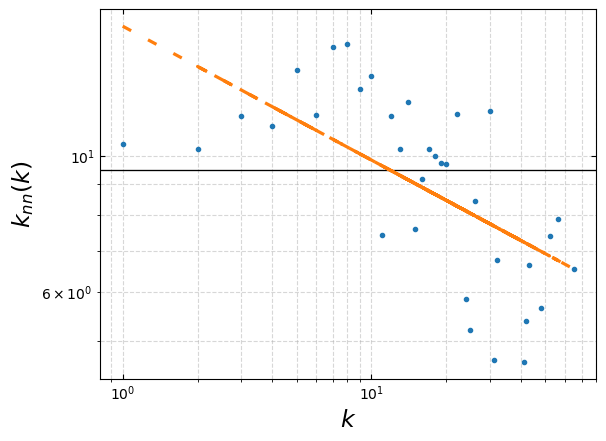

In [27]:
# Escherichia coli

plotnfit_Knn(G1, "in+out", "in+out")
plt.ylabel("$k_{nn}(k)$",size=17)
plt.xlabel("$k$",size=17)
plt.savefig("assortativityEC.png")
plt.show()

Correlation exponent: -0.16993925135194815


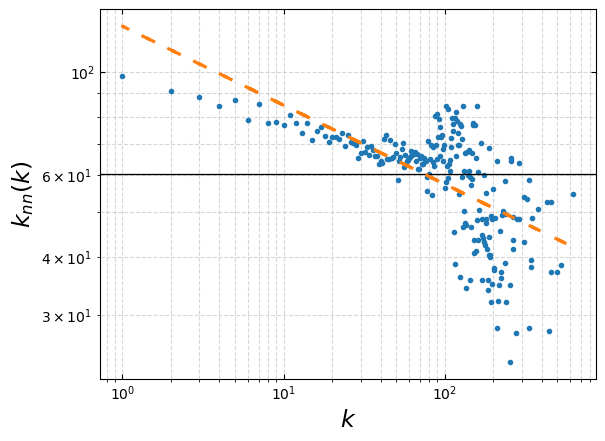

In [28]:
# Homo sapiens

plotnfit_Knn(G1HS, "in+out", "in+out")
plt.ylabel("$k_{nn}(k)$",size=17)
plt.xlabel("$k$",size=17)
plt.savefig("assortativityHS.png")
plt.show()

**The assortativity or the average connectivity of nearest neighbors of a node shows a gradual decline. The network is disassortative which means that the hub proteins tend to link with small-degree proteins. Namely, high connectivity avoiding clusters inside the network.**

**This is another evidence that these networks do not tend to form dense clusters while the information can travel through all the nodes but on a slow way, such that if a disease appears the propagation takes time.**

# Degree distribution, Power law, Scale free networks

The degree distribution when said to follow power law, can be quantified by the power law exponent $\gamma$. 

\begin{equation}
 p_k \sim k^{-\gamma}
\end{equation}

In the log log scale, the data points(degrees) set to form a straight line

\begin{equation}
 log (p_k) \sim {-\gamma}log(k)
\end{equation}


**Scale free?** This means that when we randomly choose a node, we do not know what to expect: The selected node’s degree could be tiny or arbitrarily large. Hence networks with $\gamma < 3$ do not have a meaningful internal scale, but are "scale-free". 

Counter example is Random network(recall Erdos Renyi network from earlier). 

How to say when a network follows Power law?
- Many nodes with few links
- a few hubs with large number of links


**How do we know if a network is scale-free?**
On one end, a quick look at the degree distribution will immediately reveal whether the network could be scale-free: In scale-free networks the degrees of the smallest and the largest nodes are widely different, often spanning several orders of magnitude. In contrast, these nodes have comparable degrees in a random network. As the value of the degree exponent plays an important role in predicting various network properties, we need tools to fit the pk distribution and to estimate γ. 

**A scale-free network is a network whose degree distribution follows a power law and $\gamma$ parameter is in the range $2 < \gamma < 3$.** 




In [29]:
# plotting degree distribution

# plot degree distribution with constant automated binning

def plot_constbin(degree):
    degree = np.array(degree) # if list convert to np array
    deg = degree[degree>0] # don't consider values=0

    edges= np.histogram_bin_edges(deg,bins='auto')
    pk = np.array(plt.hist(deg,bins=edges,density=True))[0]

    plt.close()

    edges2 = list(edges[1:])+[0]

    mid_point = (np.array([a+b for a,b in zip(edges,edges2)])/2)[:-1]
    plt.figure(figsize=(6,4))
    
    plt.loglog(mid_point, pk,'.',color="orangered")
    
    plt.xlabel("x",size=15)
    plt.ylabel("$P(x)$",size=15)
    plt.title("log-log plot with automated \n optimized x-axis binning, bin size = %.2f"%(edges[1]-edges[0]),
              size=14)
    print("bin size: ",(edges[1]-edges[0]))
    
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5,which='both')



/tmp/ipykernel_11343/2278695723.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pk = np.array(plt.hist(deg,bins=edges,density=True))[0]


bin size:  0.5614035087719298


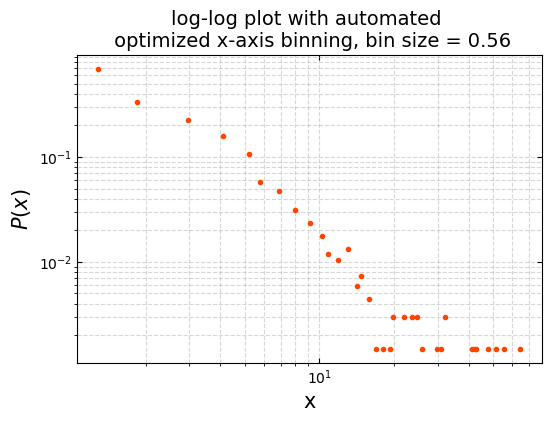

In [30]:
# list of degrees of EC nodes 
degree_listEC = list(dict(G1.degree()).values())
plot_constbin(degree_listEC)

/tmp/ipykernel_11343/2278695723.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pk = np.array(plt.hist(deg,bins=edges,density=True))[0]


bin size:  1.22265625


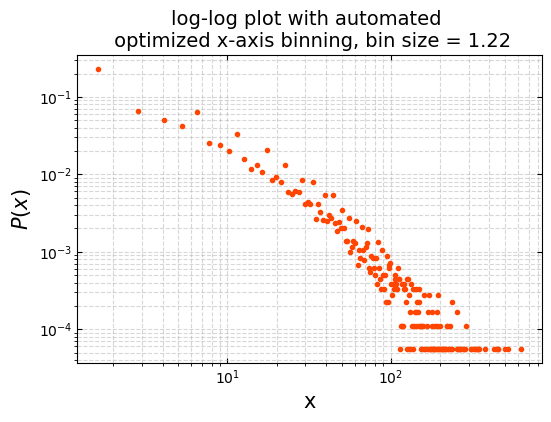

In [31]:
# list of degrees of HS nodes 
degree_listHS = list(dict(G1HS.degree()).values())
plot_constbin(degree_listHS)

In [32]:
!pip install powerlaw
!pip install statsmodels

In [33]:
# Plot and fit, find gamma
import powerlaw

from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats


def ppareto(x, shape, location):
    # x is numpy array
    return (x >= location) * (1 - (location / x)**shape)


def plotnFit_ccdf(degree, fit=True, discrete=True):
    degree = np.array(degree) # if list convert to np array
    degree = degree[degree>0] # don't consider values=0
    ecdf = ECDF(degree)
    
    
    plt.figure(figsize=(8,5))

    
    plt.loglog(degree, (1-ecdf(degree)),'.', label="Observed data",alpha=0.4)
    
    if fit==True:
            results = powerlaw.Fit(degree, discrete=discrete, estimate_discrete=discrete)
            alpha = results.power_law.alpha
            xmin =  int(results.power_law.xmin)
            sigma = results.power_law.sigma
            print("alpha: ",alpha)
            print("sigma: ",sigma)
            print("xmin: ", xmin)


            shape = alpha-1
            location = xmin

            data = np.array(list(np.arange(min(degree), max(degree))))
            x = data[data>=location]


            # multiply ccdf_model with (1-ecdf(location))
            ccdf_model = (1-ecdf(location))*(1-ppareto(x, shape, location)) # ppareto is CDF

            plt.loglog(x, ccdf_model, ls='--', c="red",linewidth=4, 
                    label="$\\alpha = %.3f \\pm %.3f$"%(alpha,sigma) )

            plt.axvline(x=location, ls="--", linewidth=1,c="green",label="$k_{min}$ = %d"%location)

    
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5,which='both')
    plt.legend(loc="best",prop={'size': 13})
    
    plt.xlabel("k",size=15)
    plt.ylabel("CCDF, P[K > k]",size=15)

Calculating best minimal value for power law fit
alpha:  2.8266551867746545
sigma:  0.15438054030245124
xmin:  7


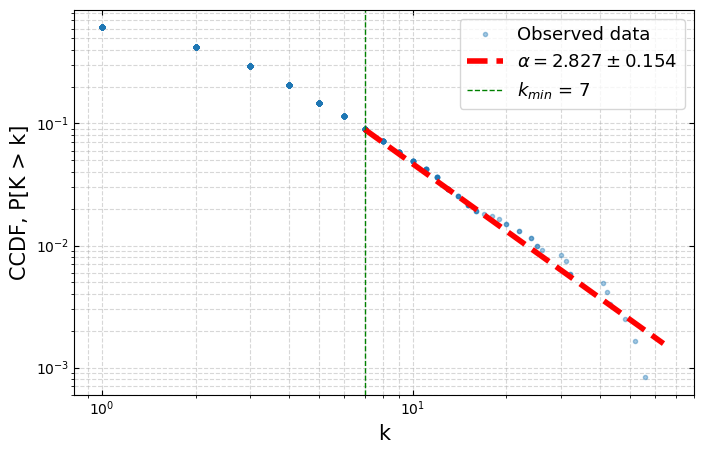

In [34]:
# Escherichia coli

plotnFit_ccdf(degree_listEC)

Calculating best minimal value for power law fit
alpha:  3.583367508367686
sigma:  0.14051666795875276
xmin:  97


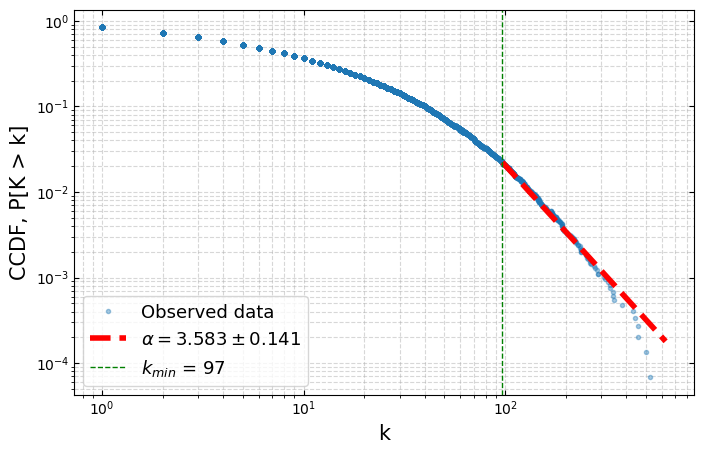

In [35]:
# Homo sapiens

plotnFit_ccdf(degree_listHS)

### Conclusions: 

* We explore the three most robust measures for determining the network topology: average shortest path length, clustering coefficient and degree distribution using Escherichia coli and Homo sapiens networks obtained from INSIDER Interactome.

    - High connectivity.
    - The network do not tend to form dense clusters.
    - The information can flux to all proteins but on a slow way.


* In general, both networks present features of scale-free network, because the degree distribution is heterogeneous i.e. many nodes with fewer links but few nodes with very high links.

* But EC network is completely "scale free", while HS network does not. 

* In HS network only from k_min > 97, it truly follows power law.